In [1]:


from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Testing connection to pro-football-reference

import pandas as pd

url = 'https://www.pro-football-reference.com/years/2021/fantasy.htm'

df_test = pd.read_html(url)[0]

df_test.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0   
                  Rk             Player                 Tm            FantPos   
0                  1  Jonathan Taylor*+                IND                 RB  \
1                  2      Cooper Kupp*+                LAR                 WR   
2                  3     Deebo Samuel*+                SFO                 WR   
3                  4         Josh Allen                BUF                 QB   
4                  5      Austin Ekeler                LAC                 RB   

  Unnamed: 4_level_0 Games     Passing             ... Scoring             
                 Age     G  GS     Cmp  Att   Yds  ...      TD  2PM  2PP   
0                 22    17  17       0    0     0  ...      20  NaN  NaN  \
1                 28    17  17       0    1     0  ...      16    1  NaN   
2                 25    16  15       1    2    24  ...      14  NaN  NaN   
3                 25    17  17     409  646  4407  ...       6    2    1   
4                 26    16  16       0    0     0  ...      20    2  NaN   

  Fantasy                                           
   FantPt    PPR   DKPt   FDPt  VBD PosRank OvRank  
0     333  373.1  381.1  353.1  176       1      1  
1     295  439.5  442.5  367.0  163       1      2  
2     262  339.0  347.0  300.5  132       2      3  
3     403  402.6  426.6  417.6  126       1      4  
4     274  343.8  352.8  308.8  120       2      5  

[5 rows x 33 columns]

In [3]:
# Test method for getting yearly players

url = 'https://www.pro-football-reference.com'
year = 2021

r = requests.get(url + '/years/' + str(year) + '/fantasy.htm')
soup = BeautifulSoup(r.content, 'html.parser')
parsed_table = soup.find_all('table')[0]  

In [4]:
# Get 2021 player data

# !!!!!!!!! May get 429 error if ran too many time/too quickly
# Had to pull data in batches and adjust parameter to get a  bit more data

# Set 2021 criteria
url = 'https://www.pro-football-reference.com'
year = 2021
max_players = 300
    
# grab fantasy players
r = requests.get(url + '/years/' + str(year) + '/fantasy.htm')
soup = BeautifulSoup(r.content, 'html.parser')
parsed_table = soup.find_all('table')[0]  

# Set dataframe that game logs will be put into
df_2021 = []

# first 2 rows are col headers
for i,row in enumerate(parsed_table.find_all('tr')[2:]):
    if i >= max_players: 
        print('Done')
        break
        
    try:
        player_row = row.find('td', attrs={'data-stat': 'player'})
        player_name = player_row.a.get_text()
        player_stub = player_row.a.get('href')
        player_stub = player_stub[:-4] + '/fantasy/' + str(year)
        player_pos = row.find('td', attrs={'data-stat': 'fantasy_pos'}).get_text()

        # grab this players stats
        player_stats = pd.read_html(url + player_stub)[0]    

        # get rid of MultiIndex, just keep last row
        player_stats.columns = player_stats.columns.get_level_values(-1)

        # Get rid of data not needed for analysis
        player_stats = player_stats.iloc[:,[1,2,3,4,5,-3]]
        
        # get rid of total row at bottom of table
        player_stats = player_stats.query('Date != "Total"')
        
        # Put player data into row
        player_stats['Name'] = name
        player_stats['Position'] = pos
        player_stats['Season'] = year

        # add row into df
        df_2021.append(player_stats)
    except:
        pass
    
df_2021 = pd.concat(df_2021)
df_2021.head()

Done


ValueError: No objects to concatenate

In [ ]:
# Copy 2021 Data

playerLog_2021 = df_2021

# Top Scoring Games

top_games_2021 = playerLog_2021.sort_values('FantPt', ascending=False)

top_games_2021


,G#,Date,Tm,Away,Opp,FantPt,Name,Position,Season
10,11.0,2021-11-21,IND,1,BUF,50.40,Jonathan Taylor,RB,2021
15,16.0,2022-01-02,CIN,0,KAN,44.60,Ja'Marr Chase,WR,2021
4,5.0,2021-10-10,LAC,0,CLE,42.82,Justin Herbert,QB,2021
1,2.0,2021-09-19,TEN,1,SEA,41.70,Derrick Henry,RB,2021
14,15.0,2021-12-26,CIN,0,BAL,38.10,Joe Burrow,QB,2021
...,...,...,...,...,...,...,...,...,...
16,17.0,2022-01-08,KAN,1,DEN,0.20,Tyreek Hill,WR,2021
3,8.0,2021-10-31,TAM,1,NOR,NaN,Rob Gronkowski,TE,2021
13,16.0,2022-01-02,BUF,0,ATL,NaN,Dawson Knox,TE,2021
12,13.0,2021-12-06,NWE,1,BUF,NaN,Hunter Henry,TE,2021


In [ ]:
# Get top QBs
variables = ['Name', 'FantPt', 'Season']

top_qbs_2021 = playerLog_2021.loc[(playerLog_2021['Position'] == 'QB'), variables]
top_qbs_2021 = top_qbs_2021.groupby(['Name']).mean()
top_qbs_2021 = top_qbs_2021.sort_values('FantPt', ascending=False)

print(top_qbs_2021)

                     FantPt  Season
Name                               
Josh Allen        23.681176  2021.0
Justin Herbert    22.397647  2021.0
Tom Brady         22.043529  2021.0
Kyler Murray      21.462857  2021.0
Patrick Mahomes   21.274118  2021.0
Jalen Hurts       20.810667  2021.0
Aaron Rodgers     20.768750  2021.0
Dak Prescott      20.035000  2021.0
Joe Burrow        19.640000  2021.0
Matthew Stafford  19.396471  2021.0
Kirk Cousins      18.771250  2021.0


In [ ]:
# Get top RBs

variables = ['Name', 'FantPt', 'Season']

top_rbs_2021 = playerLog_2021.loc[(playerLog_2021['Position'] == 'RB'), variables]
top_rbs_2021 = top_rbs_2021.groupby(['Name']).mean()
top_rbs_2021 = top_rbs_2021.sort_values('FantPt', ascending=False)

print(top_rbs_2021)

                          FantPt  Season
Name                                    
Derrick Henry          21.912500  2021.0
Jonathan Taylor        19.594118  2021.0
Austin Ekeler          17.112500  2021.0
Joe Mixon              15.368750  2021.0
James Conner           14.713333  2021.0
Alvin Kamara           14.438462  2021.0
Nick Chubb             13.950000  2021.0
Najee Harris           13.335294  2021.0
Leonard Fournette      13.328571  2021.0
Dalvin Cook            13.253846  2021.0
Damien Harris          12.806667  2021.0
Ezekiel Elliott        12.062353  2021.0
Aaron Jones            11.800000  2021.0
Antonio Gibson         11.693750  2021.0
Josh Jacobs            11.466667  2021.0
Cordarrelle Patterson  11.412500  2021.0
Melvin Gordon          11.140000  2021.0


In [ ]:
# Get top wrs 

variables = ['Name', 'FantPt', 'Season']

top_wrs_2021 = playerLog_2021.loc[(playerLog_2021['Position'] == 'WR'), variables]
top_wrs_2021 = top_wrs_2021.groupby(['Name']).mean()
top_wrs_2021 = top_wrs_2021.sort_values('FantPt', ascending=False)

print(top_wrs_2021)

                        FantPt  Season
Name                                  
Cooper Kupp          17.323529  2021.0
Deebo Samuel         16.372500  2021.0
Davante Adams        13.831250  2021.0
Ja'Marr Chase        13.152941  2021.0
Justin Jefferson     13.082353  2021.0
Mike Evans           11.781250  2021.0
Tyreek Hill          10.911765  2021.0
Stefon Diggs         10.735294  2021.0
Mike Williams        10.662500  2021.0
Tyler Lockett        10.525000  2021.0
Diontae Johnson      10.462500  2021.0
Tee Higgins          10.364286  2021.0
Chris Godwin         10.314286  2021.0
D.K. Metcalf          9.958824  2021.0
CeeDee Lamb           9.612500  2021.0
Keenan Allen          9.487500  2021.0
Hunter Renfrow        9.182353  2021.0
Jaylen Waddle         8.862500  2021.0
Michael Pittman Jr.   8.858824  2021.0
D.J. Moore            8.500000  2021.0


In [ ]:
# Get top tes

variables = ['Name', 'FantPt', 'Season']

top_tes_2021 = playerLog_2021.loc[(playerLog_2021['Position'] == 'TE'), variables]
top_tes_2021 = top_tes_2021.groupby(['Name']).mean()
top_tes_2021 = top_tes_2021.sort_values('FantPt', ascending=False)

print(top_tes_2021)

                   FantPt  Season
Name                             
Mark Andrews    11.417647  2021.0
Travis Kelce    10.675000  2021.0
Rob Gronkowski  10.563636  2021.0
George Kittle    9.071429  2021.0
Dawson Knox      8.221429  2021.0
Dalton Schultz   7.694118  2021.0
Hunter Henry     7.143750  2021.0
<class 'pandas.core.frame.DataFrame'>


In [ ]:
# Get 2020 player data

# !!!!!!!!! May get 429 error if ran too many time/too quickly
# Had to pull data in batches and adjust parameter to get a  bit more data

# Set 2020 criteria
url = 'https://www.pro-football-reference.com'
year = 2020
max_players = 300
    
# grab fantasy players
r = requests.get(url + '/years/' + str(year) + '/fantasy.htm')
soup = BeautifulSoup(r.content, 'html.parser')
parsed_table = soup.find_all('table')[0]  

# Set dataframe that game logs will be put into
df_2020 = []

# first 2 rows are col headers
for i,row in enumerate(parsed_table.find_all('tr')[2:]):
    if i >= max_players: 
        print('Done')
        break
        
    try:
        player_row = row.find('td', attrs={'data-stat': 'player'})
        player_name = player_row.a.get_text()
        player_stub = player_row.a.get('href')
        player_stub = player_stub[:-4] + '/fantasy/' + str(year)
        player_pos = row.find('td', attrs={'data-stat': 'fantasy_pos'}).get_text()

        # grab this players stats
        player_stats = pd.read_html(url + player_stub)[0]    

        # get rid of MultiIndex, just keep last row
        player_stats.columns = player_stats.columns.get_level_values(-1)

        # Get rid of data not needed for analysis
        player_stats = player_stats.iloc[:,[1,2,3,4,5,-3]]
        
        # get rid of total row at bottom of table
        player_stats = player_stats.query('Date != "Total"')
        
        # Put player data into row
        player_stats['Name'] = name
        player_stats['Position'] = pos
        player_stats['Season'] = year

        # add row into df
        df_2020.append(player_stats)
    except:
        pass
    
df_2020 = pd.concat(df_2020)
df_2020.head()

0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 
Complete.


,G#,Date,Tm,Away,Opp,FantPt,Name,Position,Season
0,1.0,2020-09-14,TEN,1,DEN,13.1,Derrick Henry,RB,2020
1,2.0,2020-09-20,TEN,0,JAX,8.4,Derrick Henry,RB,2020
2,3.0,2020-09-27,TEN,1,MIN,25.0,Derrick Henry,RB,2020
3,4.0,2020-10-13,TEN,0,BUF,18.3,Derrick Henry,RB,2020
4,5.0,2020-10-18,TEN,0,HOU,38.4,Derrick Henry,RB,2020


In [ ]:
# Get 2019 player data

# !!!!!!!!! May get 429 error if ran too many time/too quickly
# Had to pull data in batches and adjust parameter to get a  bit more data

# Set 2019 criteria
url = 'https://www.pro-football-reference.com'
year = 2019
max_players = 300
    
# grab fantasy players
r = requests.get(url + '/years/' + str(year) + '/fantasy.htm')
soup = BeautifulSoup(r.content, 'html.parser')
parsed_table = soup.find_all('table')[0]  

# Set dataframe that game logs will be put into
df_2019 = []

# first 2 rows are col headers
for i,row in enumerate(parsed_table.find_all('tr')[2:]):
    if i >= max_players: 
        print('Done')
        break
        
    try:
        player_row = row.find('td', attrs={'data-stat': 'player'})
        player_name = player_row.a.get_text()
        player_stub = player_row.a.get('href')
        player_stub = player_stub[:-4] + '/fantasy/' + str(year)
        player_pos = row.find('td', attrs={'data-stat': 'fantasy_pos'}).get_text()

        # grab this players stats
        player_stats = pd.read_html(url + player_stub)[0]    

        # get rid of MultiIndex, just keep last row
        player_stats.columns = player_stats.columns.get_level_values(-1)

        # Get rid of data not needed for analysis
        player_stats = player_stats.iloc[:,[1,2,3,4,5,-3]]
        
        # get rid of total row at bottom of table
        player_stats = player_stats.query('Date != "Total"')
        
        # Put player data into row
        player_stats['Name'] = name
        player_stats['Position'] = pos
        player_stats['Season'] = year

        # add row into df
        df_2019.append(player_stats)
    except:
        pass
    
df_2019 = pd.concat(df_2019)
df_2019.head()

0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 
Complete.


,G#,Date,Tm,Away,Opp,FantPt,Name,Position,Season
0,1.0,2019-09-08,CAR,0,LAR,32.9,Christian McCaffrey,RB,2019
1,2.0,2019-09-12,CAR,0,TAM,5.3,Christian McCaffrey,RB,2019
2,3.0,2019-09-22,CAR,1,ARI,24.8,Christian McCaffrey,RB,2019
3,4.0,2019-09-29,CAR,1,HOU,23.9,Christian McCaffrey,RB,2019
4,5.0,2019-10-06,CAR,0,JAX,41.7,Christian McCaffrey,RB,2019


In [ ]:
# Copy 2020 df

playerLog_2020 = df_2020

In [ ]:
# Copy 2019 df

playerLog_2019 = df_2019

In [ ]:
# Combine 2019, 2020, and 2021 dfs
frames = [playerLog_2021, playerLog_2020, playerLog_2019]
playerLog_Total = pd.concat(frames)

playerLog_Total

,G#,Date,Tm,Away,Opp,FantPt,Name,Position,Season
0,1.0,2021-09-12,IND,0,SEA,11.6,Jonathan Taylor,RB,2021
1,2.0,2021-09-19,IND,0,LAR,5.3,Jonathan Taylor,RB,2021
2,3.0,2021-09-26,IND,1,TEN,7.2,Jonathan Taylor,RB,2021
3,4.0,2021-10-03,IND,1,MIA,17.4,Jonathan Taylor,RB,2021
4,5.0,2021-10-11,IND,1,BAL,28.9,Jonathan Taylor,RB,2021
...,...,...,...,...,...,...,...,...,...
11,12.0,2019-12-01,NWE,1,HOU,15.9,Julian Edelman,WR,2019
12,13.0,2019-12-08,NWE,0,KAN,16.3,Julian Edelman,WR,2019
13,14.0,2019-12-15,NWE,1,CIN,0.9,Julian Edelman,WR,2019
14,15.0,2019-12-21,NWE,0,BUF,9.2,Julian Edelman,WR,2019


In [ ]:
# Best seasons by a player over all positions 
top_seasons_by_player = playerLog_Total.groupby(['Name', 'Season']).agg({'FantPt': ['mean', 'min', 'max']})
top_seasons_by_player.columns = ['FantPt_mean', 'FantPt_min', 'FantPt_max']
top_seasons_by_player = top_seasons_by_player.reset_index()

top_seasons_by_player = top_seasons_by_player.sort_values('FantPt_mean', ascending=False)

top_seasons_by_player

,Name,Season,FantPt_mean,FantPt_min,FantPt_max
92,Lamar Jackson,2019,27.712000,11.44,37.08
113,Patrick Mahomes,2020,24.960000,12.00,40.00
73,Josh Allen,2020,24.691250,12.46,37.66
5,Aaron Rodgers,2020,23.891250,3.80,30.90
74,Josh Allen,2021,23.681176,9.56,37.22
...,...,...,...,...,...
28,D.J. Moore,2021,8.500000,2.40,23.90
43,Dawson Knox,2021,8.221429,1.40,17.70
38,Darren Waller,2019,8.187500,3.70,24.60
33,Dalton Schultz,2021,7.694118,0.40,20.00


In [ ]:
# Best players over 2019-2021

top_seasons_by_player_19_21 = playerLog_Total.loc[(playerLog_Total['Name'] != ''), variables].groupby(['Name']).mean()


#top_seasons_by_player_19_21.columns = ['FantPt_mean', 'FantPt_min', 'FantPt_max']
#top_seasons_by_player_19_21 = top_seasons_by_player.reset_index()

top_seasons_by_player_19_21 = top_seasons_by_player_19_21.sort_values('FantPt', ascending=False)

top_seasons_by_player_19_21

,FantPt,Season
Name,,
Lamar Jackson,24.948667,2019.500000
Josh Allen,24.170909,2020.515152
Patrick Mahomes,23.001875,2020.531250
Kyler Murray,22.640667,2020.466667
Aaron Rodgers,22.330000,2020.500000
...,...,...
Zach Ertz,8.506667,2019.000000
D.J. Moore,8.500000,2021.000000
Dawson Knox,8.221429,2021.000000


In [ ]:
# Add position column
position_List = playerLog_Total[['Name', 'Position']]

position_List = position_List.drop_duplicates()

position_List

top_seasons_by_player_19_21_POSITION = pd.merge(top_seasons_by_player_19_21, position_List, on = 'Name', how = 'left')

# Players with average highest fantasy points over 2019-21 with position
top_seasons_by_player_19_21_POSITION

,Name,FantPt,Season,Position
0,Lamar Jackson,24.948667,2019.500000,QB
1,Josh Allen,24.170909,2020.515152,QB
2,Patrick Mahomes,23.001875,2020.531250,QB
3,Kyler Murray,22.640667,2020.466667,QB
4,Aaron Rodgers,22.330000,2020.500000,QB
...,...,...,...,...
84,Zach Ertz,8.506667,2019.000000,TE
85,D.J. Moore,8.500000,2021.000000,WR
86,Dawson Knox,8.221429,2021.000000,TE
87,Dalton Schultz,7.694118,2021.000000,TE


FantPt_mean    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

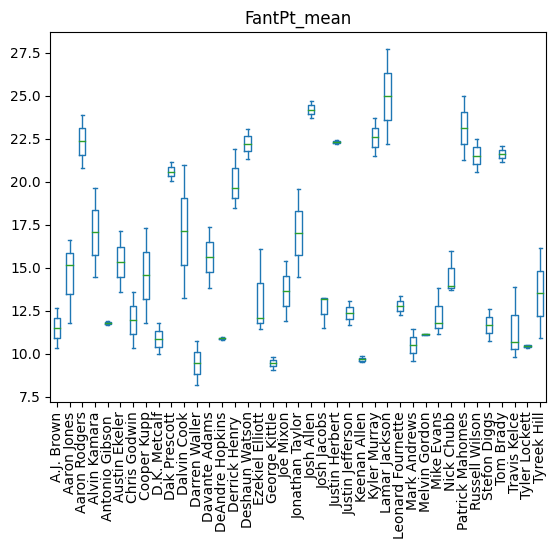

In [ ]:
# Get overall player plot

filter_top_seasons = top_seasons_by_player.groupby('Name').filter(lambda x : len(x) > 1)
overall_plot = filter_top_seasons.plot.box(by = 'Name', column = 'FantPt_mean', rot = 90)
overall_plot

In [ ]:
# Find the top players of 2021

top_seasons_by_player_2021 = playerLog_2021.groupby(['Name']).agg({'FantPt': ['mean', 'min', 'max']})
top_seasons_by_player_2021.columns = ['FantPt_mean', 'FantPt_min', 'FantPt_max']
top_seasons_by_player_2021 = top_seasons_by_player_2021.reset_index()

top_seasons_by_player_2021 = top_seasons_by_player_2021.sort_values('FantPt_mean', ascending=False)

top_seasons_by_player_2021

,Name,FantPt_mean,FantPt_min,FantPt_max
31,Josh Allen,23.681176,9.56,37.22
33,Justin Herbert,22.397647,11.00,42.82
51,Tom Brady,22.043529,4.76,37.74
18,Derrick Henry,21.912500,6.80,41.70
37,Kyler Murray,21.462857,9.06,33.56
47,Patrick Mahomes,21.274118,7.50,36.24
25,Jalen Hurts,20.810667,6.86,30.78
1,Aaron Rodgers,20.768750,1.32,33.50
11,Dak Prescott,20.035000,2.64,31.80
28,Joe Burrow,19.640000,7.38,38.10


In [ ]:
# Find the top season by QBs

top_seasons_by_player_QB = playerLog_Total.loc[(playerLog_Total['Position'] == 'QB'), ]

top_seasons_by_player_QB = top_seasons_by_player_QB.groupby(['Name', 'Season']).agg({'FantPt': ['mean', 'min', 'max']})
top_seasons_by_player_QB.columns = ['FantPt_mean', 'FantPt_min', 'FantPt_max']
top_seasons_by_player_QB = top_seasons_by_player_QB.reset_index()

top_seasons_by_player_QB = top_seasons_by_player_QB.sort_values('FantPt_mean', ascending=False)

top_seasons_by_player_QB

,Name,Season,FantPt_mean,FantPt_min,FantPt_max
18,Lamar Jackson,2019,27.712000,11.44,37.08
21,Patrick Mahomes,2020,24.960000,12.00,40.00
11,Josh Allen,2020,24.691250,12.46,37.66
0,Aaron Rodgers,2020,23.891250,3.80,30.90
12,Josh Allen,2021,23.681176,9.56,37.22
16,Kyler Murray,2020,23.671250,3.78,37.92
7,Deshaun Watson,2020,23.082500,14.12,33.12
24,Russell Wilson,2020,22.486250,9.92,36.80
14,Justin Herbert,2021,22.397647,11.00,42.82
13,Justin Herbert,2020,22.189333,4.36,38.48


FantPt_mean    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

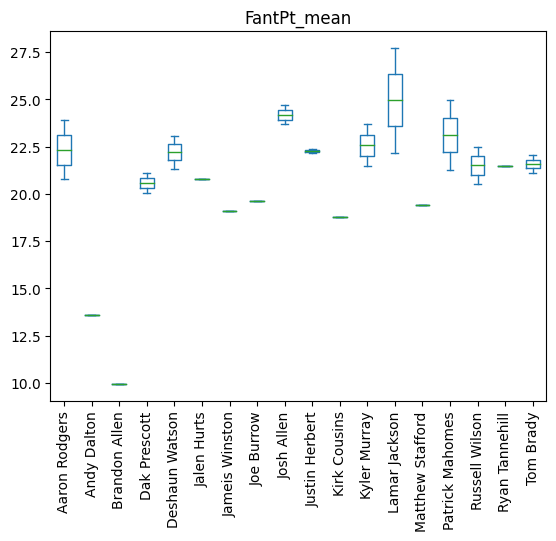

In [ ]:
# Plot the top seasons by a qb
qb_plot = top_seasons_by_player_QB.plot.box(by = 'Name', column = 'FantPt_mean', rot = 90)
qb_plot

In [ ]:
# Get top RB seasons

top_seasons_by_player_RB = playerLog_Total.loc[(playerLog_Total['Position'] == 'RB'), ]

top_seasons_by_player_RB = top_seasons_by_player_RB.groupby(['Name', 'Season']).agg({'FantPt': ['mean', 'min', 'max']})
top_seasons_by_player_RB.columns = ['FantPt_mean', 'FantPt_min', 'FantPt_max']
top_seasons_by_player_RB = top_seasons_by_player_RB.reset_index()

top_seasons_by_player_RB = top_seasons_by_player_RB.sort_values('FantPt_mean', ascending=False)

top_seasons_by_player_RB

,Name,Season,FantPt_mean,FantPt_min,FantPt_max
10,Christian McCaffrey,2019,22.200000,5.3,41.7
19,Derrick Henry,2021,21.912500,6.8,41.7
13,Dalvin Cook,2020,20.985714,6.2,46.6
3,Alvin Kamara,2020,19.653333,5.2,53.2
18,Derrick Henry,2020,19.631250,4.9,38.4
28,Jonathan Taylor,2021,19.594118,5.3,50.4
17,Derrick Henry,2019,18.440000,3.3,39.1
8,Austin Ekeler,2021,17.112500,5.5,35.5
12,Dalvin Cook,2019,17.100000,4.3,26.9
0,Aaron Jones,2019,16.612500,2.9,42.2


FantPt_mean    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

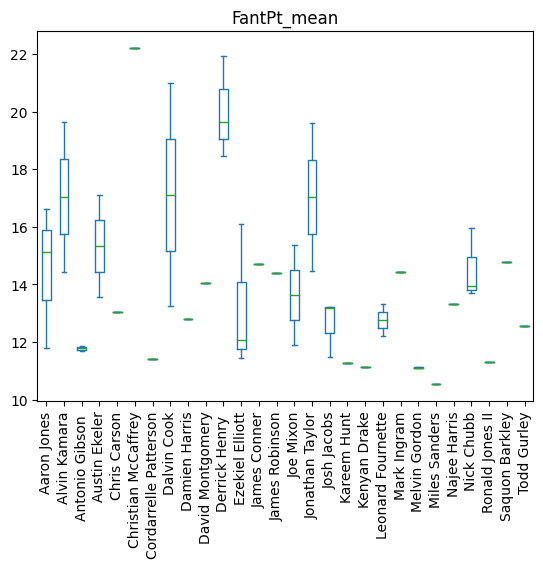

In [ ]:
rb_plot = top_seasons_by_player_RB.plot.box(by = 'Name', column = 'FantPt_mean', rot = 90)
rb_plot

In [ ]:
top_seasons_by_player_WR = playerLog_Total.loc[(playerLog_Total['Position'] == 'WR'), ]

top_seasons_by_player_WR = top_seasons_by_player_WR.groupby(['Name', 'Season']).agg({'FantPt': ['mean', 'min', 'max']})
top_seasons_by_player_WR.columns = ['FantPt_mean', 'FantPt_min', 'FantPt_max']
top_seasons_by_player_WR = top_seasons_by_player_WR.reset_index()

top_seasons_by_player_WR = top_seasons_by_player_WR.sort_values('FantPt_mean', ascending=False)

top_seasons_by_player_WR

,Name,Season,FantPt_mean,FantPt_min,FantPt_max
14,Davante Adams,2020,17.385714,3.6,32.2
10,Cooper Kupp,2021,17.323529,6.4,27.8
19,Deebo Samuel,2021,16.372500,5.2,27.7
43,Tyreek Hill,2020,16.126667,2.5,44.9
32,Michael Thomas,2019,14.100000,3.7,30.2
15,Davante Adams,2021,13.831250,4.2,26.6
33,Mike Evans,2019,13.808333,2.8,37.0
5,Calvin Ridley,2020,13.678571,2.6,24.9
7,Chris Godwin,2019,13.578571,4.0,30.4
22,Ja'Marr Chase,2021,13.152941,0.3,44.6


FantPt_mean    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

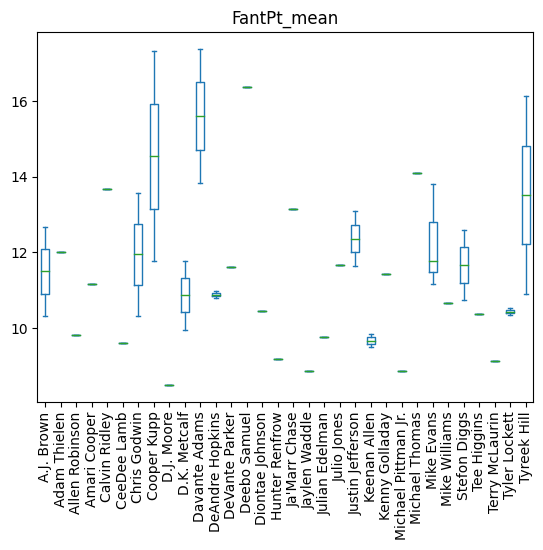

In [ ]:
wr_plot = top_seasons_by_player_WR.plot.box(by = 'Name', column = 'FantPt_mean', rot = 90)
wr_plot

In [ ]:
top_seasons_by_player_TE = playerLog_Total.loc[(playerLog_Total['Position'] == 'TE'), ]

top_seasons_by_player_TE = top_seasons_by_player_TE.groupby(['Name', 'Season']).agg({'FantPt': ['mean', 'min', 'max']})
top_seasons_by_player_TE.columns = ['FantPt_mean', 'FantPt_min', 'FantPt_max']
top_seasons_by_player_TE = top_seasons_by_player_TE.reset_index()

top_seasons_by_player_TE = top_seasons_by_player_TE.sort_values('FantPt_mean', ascending=False)

top_seasons_by_player_TE

,Name,Season,FantPt_mean,FantPt_min,FantPt_max
13,Travis Kelce,2020,13.850667,3.1,19.6
10,Mark Andrews,2021,11.417647,2.0,30.7
3,Darren Waller,2020,10.725000,0.9,32.0
14,Travis Kelce,2021,10.675000,0.7,31.1
11,Rob Gronkowski,2021,10.563636,2.3,21.0
12,Travis Kelce,2019,9.831250,2.4,16.7
5,George Kittle,2019,9.821429,1.4,18.9
9,Mark Andrews,2019,9.546667,1.4,21.3
6,George Kittle,2021,9.071429,1.0,30.6
0,Austin Hooper,2019,8.976923,2.0,18.6


FantPt_mean    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

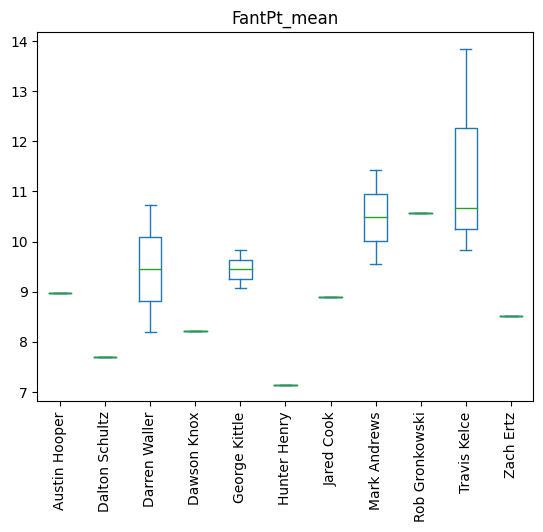

In [ ]:
te_plot = top_seasons_by_player_TE.plot.box(by = 'Name', column = 'FantPt_mean', rot = 90)
te_plot

In [ ]:
# Get the top overall sacoring games

top_games_overall = playerLog_Total.sort_values('FantPt', ascending = False)
top_games_overall

,G#,Date,Tm,Away,Opp,FantPt,Name,Position,Season
14,15.0,2020-12-25,NOR,0,MIN,53.2,Alvin Kamara,RB,2020
10,11.0,2021-11-21,IND,1,BUF,50.4,Jonathan Taylor,RB,2021
5,7.0,2020-11-01,MIN,1,GNB,46.6,Dalvin Cook,RB,2020
10,11.0,2020-11-29,KAN,1,TAM,44.9,Tyreek Hill,WR,2020
15,16.0,2022-01-02,CIN,0,KAN,44.6,Ja'Marr Chase,WR,2021
...,...,...,...,...,...,...,...,...,...
0,2.0,2020-09-20,DAL,0,ATL,NaN,Andy Dalton,QB,2020
8,9.0,2019-11-10,LAR,1,PIT,NaN,Cooper Kupp,WR,2019
1,2.0,2019-09-15,MIA,0,NWE,NaN,DeVante Parker,WR,2019
10,11.0,2019-11-24,DAL,1,NWE,NaN,Amari Cooper,WR,2019


<AxesSubplot: xlabel='Name_Pos'>

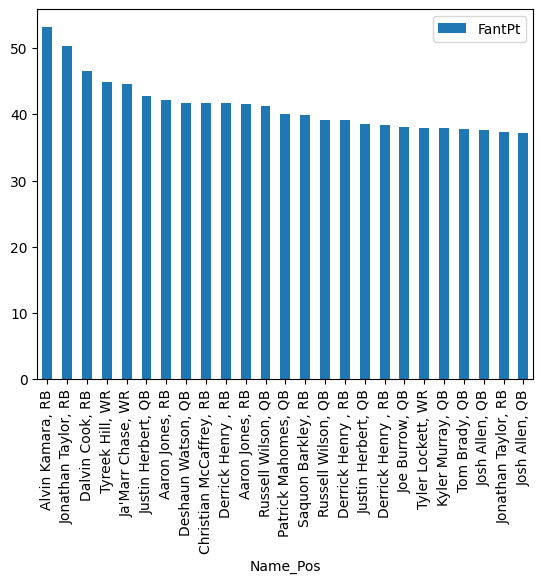

In [ ]:
# plot the top over all games

top_games_overall['Name_Pos'] = top_games_overall['Name'] + ', ' + top_games_overall['Position']

top_games_chart = top_games_overall.head(25).plot.bar(x = 'Name_Pos', y = 'FantPt')


top_games_chart

In [ ]:
top_games_overall

,G#,Date,Tm,Away,Opp,FantPt,Name,Position,Season,Name_Pos
14,15.0,2020-12-25,NOR,0,MIN,53.2,Alvin Kamara,RB,2020,"Alvin Kamara, RB"
10,11.0,2021-11-21,IND,1,BUF,50.4,Jonathan Taylor,RB,2021,"Jonathan Taylor, RB"
5,7.0,2020-11-01,MIN,1,GNB,46.6,Dalvin Cook,RB,2020,"Dalvin Cook, RB"
10,11.0,2020-11-29,KAN,1,TAM,44.9,Tyreek Hill,WR,2020,"Tyreek Hill, WR"
15,16.0,2022-01-02,CIN,0,KAN,44.6,Ja'Marr Chase,WR,2021,"Ja'Marr Chase, WR"
...,...,...,...,...,...,...,...,...,...,...
0,2.0,2020-09-20,DAL,0,ATL,NaN,Andy Dalton,QB,2020,"Andy Dalton, QB"
8,9.0,2019-11-10,LAR,1,PIT,NaN,Cooper Kupp,WR,2019,"Cooper Kupp, WR"
1,2.0,2019-09-15,MIA,0,NWE,NaN,DeVante Parker,WR,2019,"DeVante Parker, WR"
10,11.0,2019-11-24,DAL,1,NWE,NaN,Amari Cooper,WR,2019,"Amari Cooper, WR"


In [ ]:
# Fantasy points against based on opponants
easy_opps_QBs = playerLog_Total.loc[(playerLog_Total['Position'] == 'QB'), ]
easy_opps_RBs = playerLog_Total.loc[(playerLog_Total['Position'] == 'RB'), ]
easy_opps_WRs = playerLog_Total.loc[(playerLog_Total['Position'] == 'WR'), ]
easy_opps_TEs = playerLog_Total.loc[(playerLog_Total['Position'] == 'TE'), ]



FantPt    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

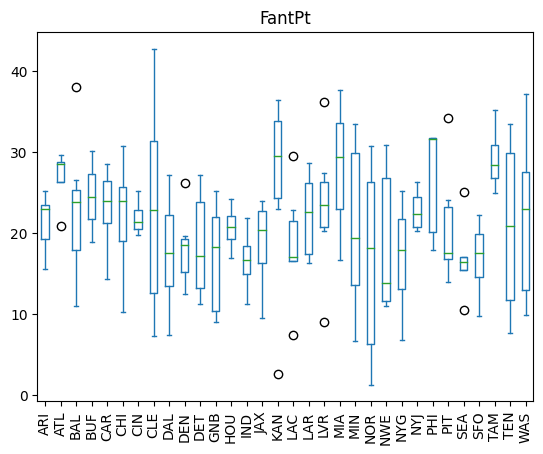

In [ ]:
# Get the easiest opponant for a QB

easy_opps_QBs = playerLog_Total.loc[(playerLog_Total['Position'] == 'QB'), ]

easy_opps_QBs = easy_opps_QBs.reset_index(drop = True)
easy_opps_QBs = easy_opps_QBs.loc[(easy_opps_QBs['Season'] == 2021), ]
opp_qb_scoring_box = easy_opps_QBs.plot.box(by = 'Opp', column = 'FantPt', rot = 90)
opp_qb_scoring_box

FantPt    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

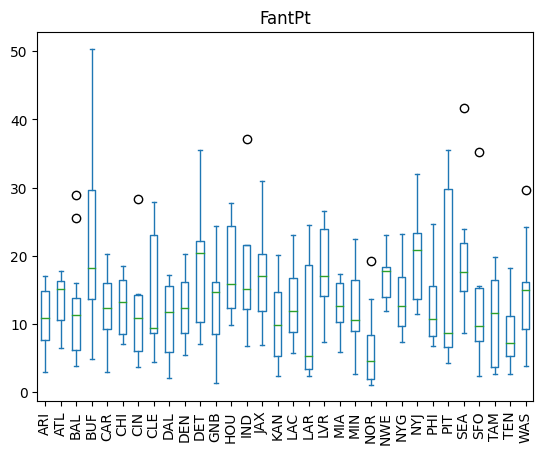

In [ ]:
# Get the easiest opponant for a RB

easy_opps_RBs = playerLog_Total.loc[(playerLog_Total['Position'] == 'RB'), ]

easy_opps_RBs = easy_opps_RBs.reset_index(drop = True)
easy_opps_RBs = easy_opps_RBs.loc[(easy_opps_RBs['Season'] == 2021), ]
opp_rb_scoring_box = easy_opps_RBs.plot.box(by = 'Opp', column = 'FantPt', rot = 90)
opp_rb_scoring_box

FantPt    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

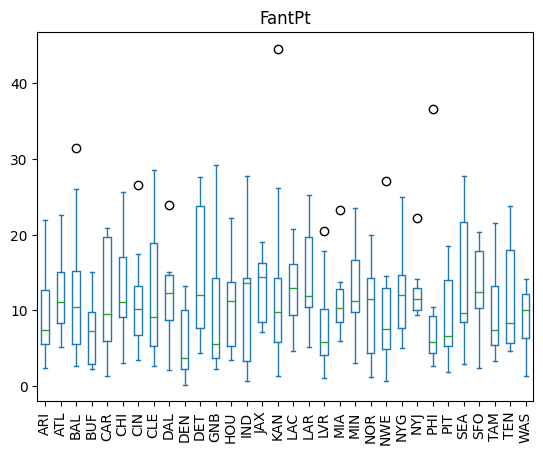

In [ ]:
# Get and plot the easiest opponant for a WR

easy_opps_WRs = playerLog_Total.loc[(playerLog_Total['Position'] == 'WR'), ]

easy_opps_WRs = easy_opps_WRs.reset_index(drop = True)
easy_opps_WRs = easy_opps_WRs.loc[(easy_opps_WRs['Season'] == 2021), ]
opp_wr_scoring_box = easy_opps_WRs.plot.box(by = 'Opp', column = 'FantPt', rot = 90)

opp_wr_scoring_box

FantPt    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

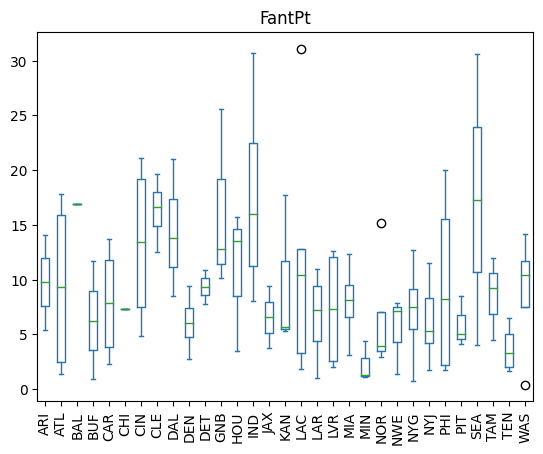

In [ ]:
# Get and plot the easiest opponant for a TE

easy_opps_TEs = playerLog_Total.loc[(playerLog_Total['Position'] == 'TE'), ]

easy_opps_TEs = easy_opps_TEs.reset_index(drop = True)
easy_opps_TEs = easy_opps_TEs.loc[(easy_opps_TEs['Season'] == 2021), ]
opp_te_scoring_box = easy_opps_TEs.plot.box(by = 'Opp', column = 'FantPt', rot = 90)
opp_te_scoring_box